## Pima Indians Diabetes dataset (classification)

* Question: **Can we predict the diabetes status** of a patient givne their health measurements?
* Data source : Kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* This notebook aims to examine various **classification evaluation metrics** and **ROC Curves and AUC**
    * ex. confusion matrix, senstivity, precision, etc.

In [1]:
import pandas as pd
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv('diabetes.csv')
print(pima.head())
print(pima.shape)
print("* percentage of outcome \"1\" (diabetes): {}%".format(round(pima[pima['Outcome']==0].shape[0]/pima.shape[0]*100,2)))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
* percentage of outcome "1" (diabetes): 65.1%


### Column names - those are medical predictor (independent) variables.
* **Pregnancies** : Number of times pregnant
* **Glucose** : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure** : Diastolic blood pressure (mm Hg)
* **SkinThickness** : Triceps skin fold thickness (mm)
* **Insulin** : 2-Hour serum insulin (mu U/ml)
* **BMI** : Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction** : Diabetes pedigree function
* **Outcome** : Class variable (0 or 1) 268 of 768 are 1, the others are 0
<br/><br/>All of those elements affects diabetes

In [2]:
#change column names for better visibility
pima.rename(columns={'Pregnancies': 'pregnant', 'Glucose': 'glucose', 'BloodPressure':'bp','SkinThickness':'skin',\
                     'Insulin':'insulin','BMI':'bmi','DiabetesPedigreeFunction':'pedigree','Age':'age',\
                     'Outcome':'label'}, inplace=True)
#pima.columns=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label'] #this works too
print(pima.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [3]:
#define X(the features) and y(the response)
feature_cols=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']
X=pima[feature_cols]
y=pima.label

In [4]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
#train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
#make predictions on testing set and check classification accuracy
y_pred_class = logreg.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

0.8072916666666666


In [23]:
#check null accuracy(accuracy that could be achieved by always predicting the most frequent class)
print(y_test.value_counts())
print("percentage of ones : ", y_test.mean())
print("percentage of zeros : ", 1-y_test.mean())

#print the first 25 trus and predicted responses
print("True: ", y_test.values[:25])
print("Pred: ", y_pred_class[:25])

0    130
1     62
Name: label, dtype: int64
percentage of ones :  0.3229166666666667
percentage of zeros :  0.6770833333333333
True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


* **Classification accuracy** is **the easiest** classification metric to understand.
* But, it does not tell you the **underlying distribution** of response values.
* And, it does not tell you what **"type" of errors** your classifier is making.

### Confusion Matrix
> table that describes the performance of a classification model

* **TP(True Positive)**: correctly predicted that they do have diabetes.
* **TN(True Negative)**: correctly predicted that they don't have diabetes.
* **FP(False Positive)**: incorrectly predicted that they do have diabetes.
* **FN(False Negative)**: incorrectly predicted that they don't have diabetes.

In [35]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1,1]
print("TP:", TP)
TN = confusion[0,0]
print("TN:", TN)
FP = confusion[0,1]
print("FP:", FP)
FN = confusion[1,0]
print("FN:", FN)

[[119  11]
 [ 26  36]]
TP: 36
TN: 119
FP: 11
FN: 26


### Matrics computed from a confusion matrix
* **classification accuracy**: overall, how often is the classifier correct?
* **classification error**: overall, how often is the classifier incorrect?
* **sensitivity**: when the actual value is positive, how often is the prediction correct?
    * also called "recall"
    * how "sensitive" is the classifier to detecting positive instances?
    * ex. detecting terrorist
* **specificity**: when the actual value is negative, how often is the prediction correct?
* **false postiive rate**: when the actual value is negative, how often is the prediction incorrect?
* **precision**: when a positive value is predicted, how often is the prediction correct?
    * How "precise" is the classifier when predicting positive instances?
    * ex. spam filter

In [36]:
#classification accuracy: overall, how often is the classifier correct?
print((TP+TN)/(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test, y_pred_class)) #same as the code line above

0.8072916666666666
0.8072916666666666


In [37]:
#classification error: overall, how often is the classifier incorrect?
print((FP+FN)/(TP+TN+FP+FN))
print(1-metrics.accuracy_score(y_test, y_pred_class))

0.19270833333333334
0.19270833333333337


In [41]:
#sensitivity: when the actual value is positive, how often is the prediction correct?
print(TP/(TP+FN))
print(metrics.recall_score(y_test, y_pred_class))

sensitivity(recall)
0.5806451612903226
0.5806451612903226


In [39]:
#specificity: when the actual value is negative, how often is the prediction correct?
print(TN/(TN+FP))

0.9153846153846154


In [42]:
#false positive rate: when the actual value is negative, how often is the prediction incorrect?
print(FP/(TN+FP))

0.08461538461538462


In [44]:
#precision: when a positive value is predicted, how often is the prediction correct?
print(TP/(TP+FP))
print(metrics.precision_score(y_test, y_pred_class))

0.7659574468085106
0.7659574468085106


* Confusion matrix gives you a more complete picture of how your classifier is performing
* Also allows you to compute various classification metrics, and these metrics can guide your model selection.

## Adjusting the classification threshold
> if we decrease the threshold, sensitivity increases. (default threshold is 0.5)

In [51]:
#compare the first 10 predicted responses and predicted prababilities
print(logreg.predict(X_test)[0:10])
print(logreg.predict_proba(X_test)[:10,:])

[1 0 0 1 0 0 1 1 0 0]
[[0.10465347 0.89534653]
 [0.78658063 0.21341937]
 [0.85907543 0.14092457]
 [0.39700987 0.60299013]
 [0.82790756 0.17209244]
 [0.92381536 0.07618464]
 [0.31023606 0.68976394]
 [0.25125597 0.74874403]
 [0.55808563 0.44191437]
 [0.62405268 0.37594732]]


Text(0, 0.5, 'Frequency')

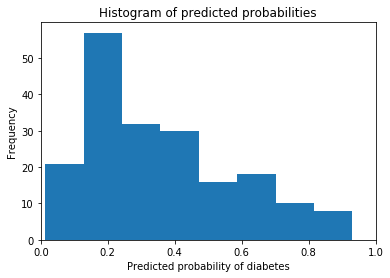

In [52]:
#visualize the first 10 predicted probabilities for class 1
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = logreg.predict_proba(X_test)[:,1]
plt.hist(y_pred_prob, bins=8) #histogram visualizes frequency
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probability of diabetes")
plt.ylabel("Frequency")

#### let's decrease the threshold(0.5->0.3) to increase sensitivity of the classifier

In [53]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob],threshold=0.3)[0]
print(y_pred_prob[:10])
print(y_pred_class[:10]) #now when prob is more than 0.3, it's classified as '1'

[0.89534653 0.21341937 0.14092457 0.60299013 0.17209244 0.07618464
 0.68976394 0.74874403 0.44191437 0.37594732]
[1. 0. 0. 1. 0. 0. 1. 1. 1. 1.]


In [54]:
#compare previous confusion matirx and current confusion matrix
print(confusion)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[119  11]
 [ 26  36]]
[[86 44]
 [ 8 54]]


In [55]:
#calculate and compare previous sensitivity and current sensitivity (it's increased)
print("previous sensitivity: ", 36/(36+26))
print("current sensitivity: ",54/(54+8))

previous sensitivity:  0.5806451612903226
current sensitivity:  0.8709677419354839


* Threshold of **0.5 is used by default** (for binary problems) to convert predicted probabilities into class predictions
* Threshold can be adjusted to increase **sensitivity** or **specificity**.
* Sensitivity and specificity have an inverse relationship.

### ROC Curves and AUC(Area Under the Curve)
* Question: wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?
* Answer: plot the ROC curve!
* 직접 하나하나 계산하지 않고, threshold의 값에 따른 sensitivity와 specificity의 변화를 한 눈에 보기


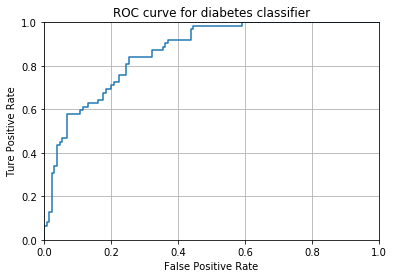

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob) #fpr: false positive rate, tpr: true positive rate
plt.plot(fpr, tpr)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title("ROC curve for diabetes classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("Ture Positive Rate")
plt.grid(True)

* ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context.
* You can't actually see the threshold used to generate the curve on the ROC curve itselt. -> let's make a function

In [67]:
def evaluate_threshold(threshold):
    print("Sensitivity: ", tpr[thresholds>threshold][-1])
    print("Specificity: ", 1-fpr[thresholds>threshold][-1])
    
print("threshold 0.5")
evaluate_threshold(0.5)
print("\nthreshold 0.3")
evaluate_threshold(0.3) #sensitivity is higher, specificity is lower

threshold 0.5
Sensitivity:  0.5806451612903226
Specificity:  0.9307692307692308

threshold 0.3
Sensitivity:  0.8709677419354839
Specificity:  0.676923076923077


### AUC : the percentage of ROC plot that is underneath the curve
* useful as **a single number summary** of classifier performance.
* if you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
* useful even when there is **high class imbalance** (unlike classification accuracy)

In [69]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

#calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
sv_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()
print(sv_auc)

0.8641439205955335
0.8250569800569801


average glucose level : 120.89453125
0      5
44     1
56     1
57     2
61     1
      ..
195    2
196    3
197    4
198    1
199    1
Name: glucose, Length: 136, dtype: int64


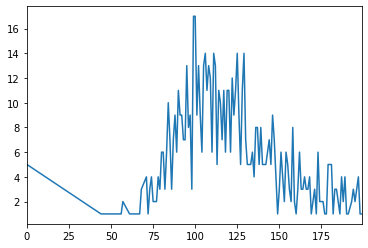

In [57]:
glucose_mean=pima['glucose'].mean()
print("average glucose level : {}".format(glucose_mean))
glucose = pima['glucose'].value_counts().sort_index()
print(glucose)
glucose.plot()

In [59]:
a=pima[(pima['glucose']<100)&(pima['label']==1)]
print(a.head(10))
print(a.shape)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
6           3       78  50    32       88  31.0     0.248   26      1
38          2       90  68    42        0  38.2     0.503   27      1
109         0       95  85    25       36  37.4     0.247   24      1
125         1       88  30    42       99  55.0     0.496   26      1
218         5       85  74    22        0  29.0     1.224   32      1
254        12       92  62     7      258  27.6     0.926   44      1
349         5        0  80    32        0  41.0     0.346   37      1
400         4       95  64     0        0  32.0     0.161   31      1
429         1       95  82    25      180  35.0     0.233   43      1
502         6        0  68    41        0  39.0     0.727   41      1
(16, 9)
